In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
fraud = pd.read_csv("C:/Users/DELL/Downloads/assignment/Decision_Trees/Fraud_check.csv")

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
fraud.duplicated().sum()

0

# Creating dummies

In [8]:
fraud = pd.get_dummies(fraud, columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [9]:
fraud.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [10]:
fraud['Taxable.Income'].max()

99619

# Creating new column TaxInc by divinding Taxable.Income w.r.t <= 30000 for risky

In [11]:
fraud['TaxInc'] = pd.cut(fraud["Taxable.Income"], bins=[0,30000, 99620], labels=['Risky','Good'])
fraud.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


In [12]:
fraud[fraud['TaxInc']=='Risky']

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
10,29732,102602,19,0,0,1,1,Risky
12,11794,148033,14,0,0,0,1,Risky
16,24987,34551,29,1,0,0,0,Risky
19,10987,126953,30,0,0,1,1,Risky
21,14310,29106,7,1,0,0,1,Risky
...,...,...,...,...,...,...,...,...
544,29916,133877,21,0,0,1,1,Risky
557,12810,157421,10,1,1,0,0,Risky
567,16316,129912,30,1,0,1,0,Risky
575,10735,95975,13,0,0,0,1,Risky


In [13]:
risky = fraud[fraud['Taxable.Income']<=30000]
risky

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
10,29732,102602,19,0,0,1,1,Risky
12,11794,148033,14,0,0,0,1,Risky
16,24987,34551,29,1,0,0,0,Risky
19,10987,126953,30,0,0,1,1,Risky
21,14310,29106,7,1,0,0,1,Risky
...,...,...,...,...,...,...,...,...
544,29916,133877,21,0,0,1,1,Risky
557,12810,157421,10,1,1,0,0,Risky
567,16316,129912,30,1,0,1,0,Risky
575,10735,95975,13,0,0,0,1,Risky


In [14]:
risky.TaxInc.value_counts()

Risky    124
Good       0
Name: TaxInc, dtype: int64

In [15]:
# Renaming columns

fraud.columns=["Taxable_Income","City_Population","Work_Experience","Undergrad_YES","Marital_Status_Married","Marital_Status_Single","Urban_YES","TaxInc"]
fraud.head()

,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


# EDA

<Axes: >

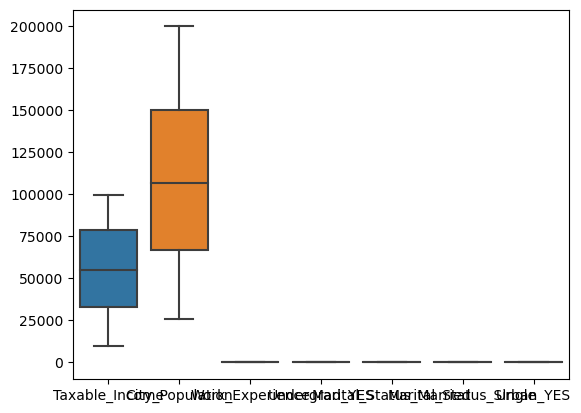

In [16]:
sns.boxplot(data=fraud)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16572\3763716165.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = fraud.corr()


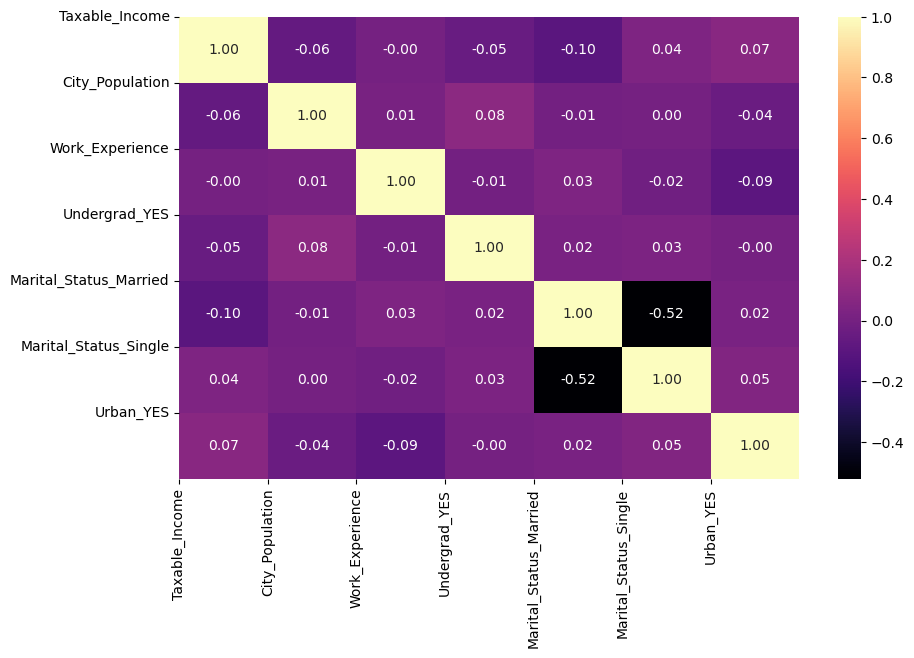

In [17]:
corr = fraud.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

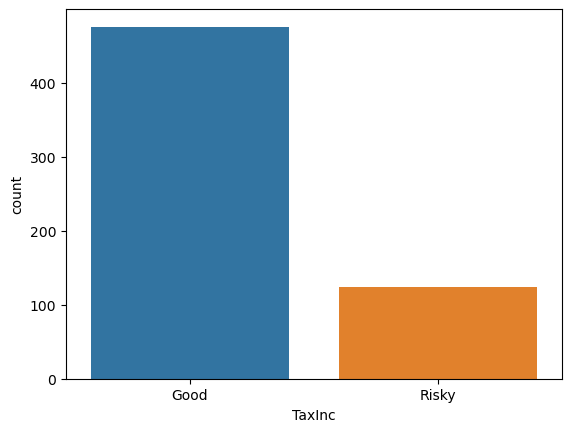

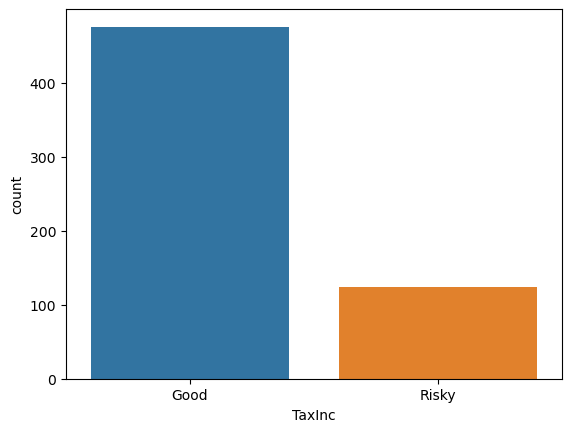

In [20]:


sns.countplot(data=fraud, x="TaxInc")
plt.show()
fraud["TaxInc"] = fraud["TaxInc"].astype(str)
sns.countplot(data=fraud, x="TaxInc")
plt.show()


In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
fraud['TaxInc'] = label_encoder.fit_transform(fraud['TaxInc'])

In [22]:
fraud.head()

,Taxable_Income,City_Population,Work_Experience,Undergrad_YES,Marital_Status_Married,Marital_Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,0
1,33700,134075,18,1,0,0,1,0
2,36925,160205,30,0,1,0,1,0
3,50190,193264,15,1,0,1,1,0
4,81002,27533,28,0,1,0,0,0


In [23]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Taxable_Income          600 non-null    int64
 1   City_Population         600 non-null    int64
 2   Work_Experience         600 non-null    int64
 3   Undergrad_YES           600 non-null    uint8
 4   Marital_Status_Married  600 non-null    uint8
 5   Marital_Status_Single   600 non-null    uint8
 6   Urban_YES               600 non-null    uint8
 7   TaxInc                  600 non-null    int32
dtypes: int32(1), int64(3), uint8(4)
memory usage: 18.9 KB


In [24]:
# Dividing data into independent variables and dependent variable
X = fraud.drop('TaxInc', axis = 1)

Y = fraud['TaxInc']



In [25]:
# Splitting data into Test & Train
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((480, 7), (120, 7), (480,), (120,))

#  Model Building

In [26]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

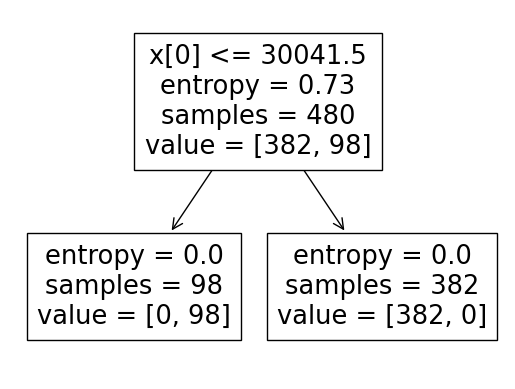

In [27]:
tree.plot_tree(model);

In [28]:
fraud.columns

Index(['Taxable_Income', 'City_Population', 'Work_Experience', 'Undergrad_YES',
       'Marital_Status_Married', 'Marital_Status_Single', 'Urban_YES',
       'TaxInc'],
      dtype='object')

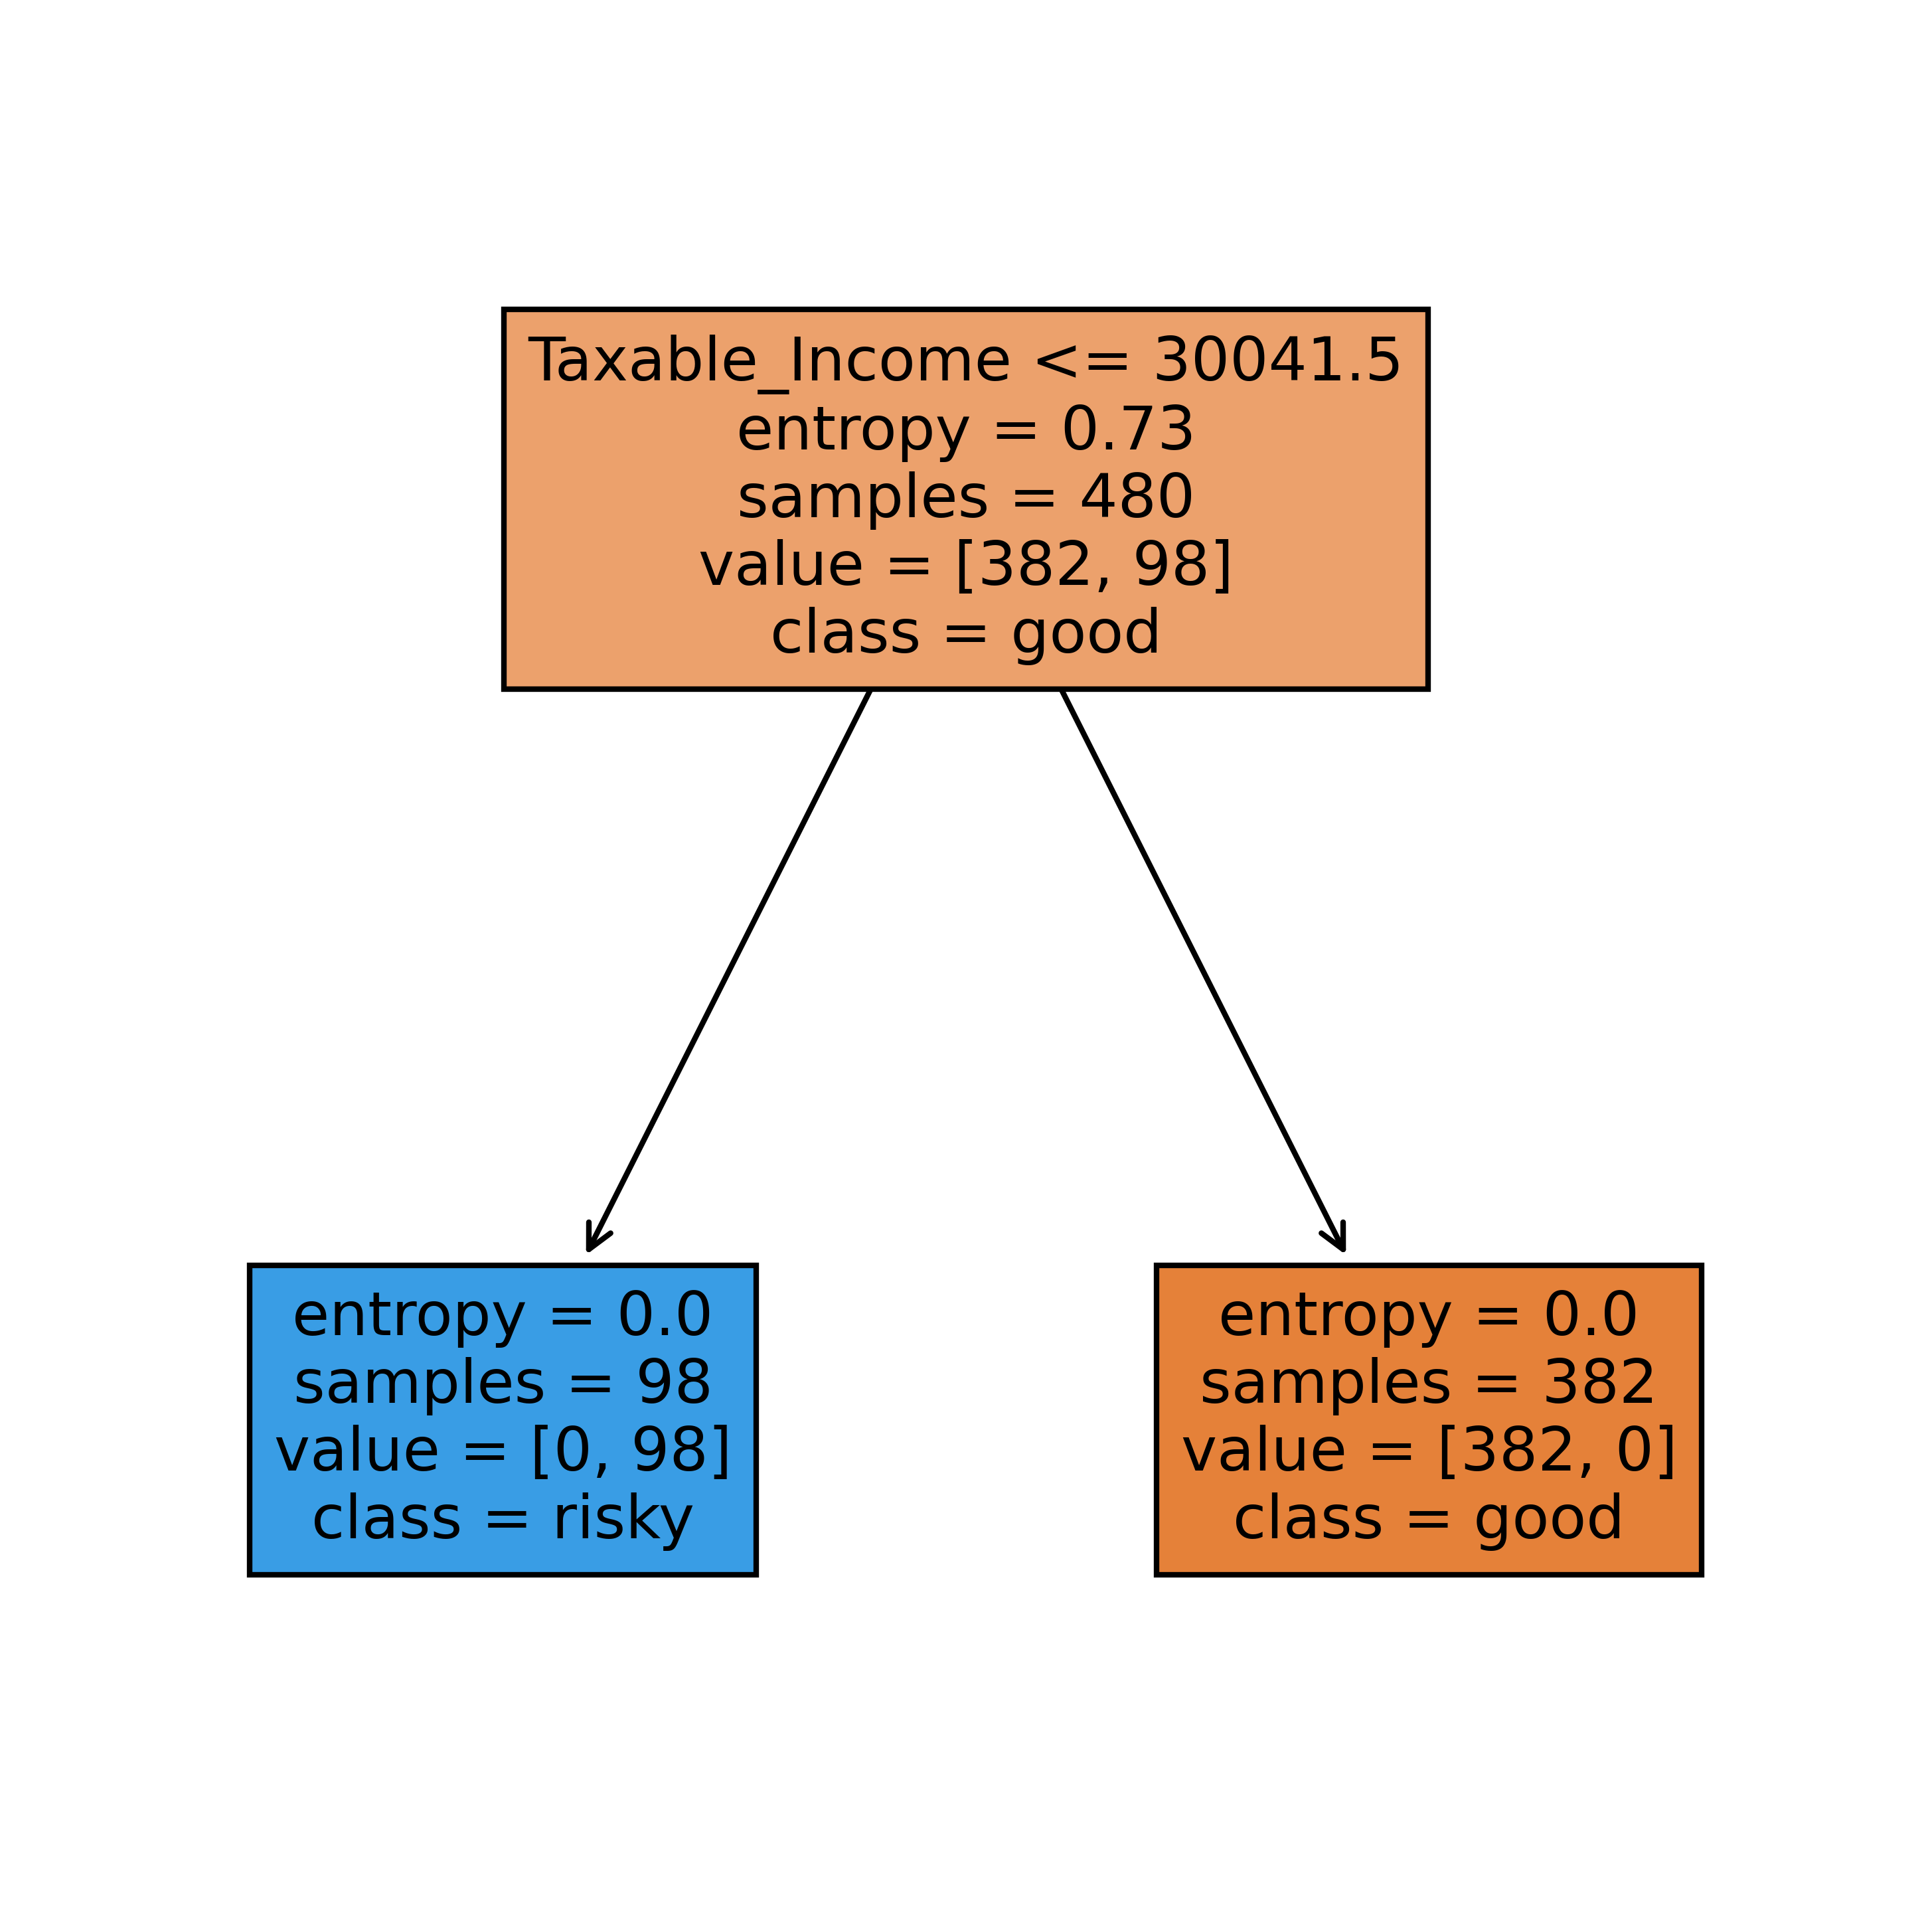

In [29]:
fn=['Taxable_Income', 'City_Population', 'Work_Experience', 'Undergrad_YES', 'Marital_Status_Married',
       'Marital_Status_Single', 'Urban_YES']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [30]:
fraud_preds = model.predict(x_test)
print(fraud_preds)
print(pd.Series(fraud_preds).value_counts())

[1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1
 0 1 0 0 0 0 0 0 1]
0    94
1    26
dtype: int64


In [31]:
model.score(x_test, y_test)

1.0

In [32]:
y_pred_df=pd.DataFrame({'actual':y_test,'Prediction':fraud_preds})
y_pred_df

,actual,Prediction
110,1,1
419,0,0
565,0,0
77,0,0
181,1,1
...,...,...
399,0,0
340,0,0
148,0,0
494,0,0


In [33]:
y_pred_df['Correct']=y_pred_df['actual']==y_pred_df['Prediction']
display(y_pred_df)

,actual,Prediction,Correct
110,1,1,True
419,0,0,True
565,0,0,True
77,0,0,True
181,1,1,True
...,...,...,...
399,0,0,True
340,0,0,True
148,0,0,True
494,0,0,True


In [34]:
y_pred_df['Correct'].value_counts()

True    120
Name: Correct, dtype: int64

In [35]:
print(classification_report(y_test,fraud_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [36]:
results=cross_val_score(model,X,Y,cv=5)
results.mean()

0.9983333333333334